In [11]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from xarray import DataArray
import pandas as pd
import pylab as plt
from scipy.stats import pearsonr

In [12]:
assi = np.load("/work/uo1075/u241321/data/eemd_t310_assi_Norwegian.npy")[2,:]
hind  = np.load("/work/uo1075/u241321/data/hind_eemd_t_80.npy")[2,:,:] # (5,9,50,10) mode(input, c1-c4), station, time, lead year

na = np.load("/work/uo1075/u241321/data/eemd_NAO_DJF.npy")   # 
nao=na[2,:]




In [13]:
hind.shape

(50, 10)

In [14]:
np.corrcoef(assi, hind[:,0])[0,1]  # acc for T

0.5763876145522335

In [15]:
sorted(nao)[14] 

-2.6610565972886424

In [16]:
sorted(nao)[-14] 

3.414681981052622

In [17]:
referx=np.linspace(-0.2,0.2)
referx.shape

(50,)

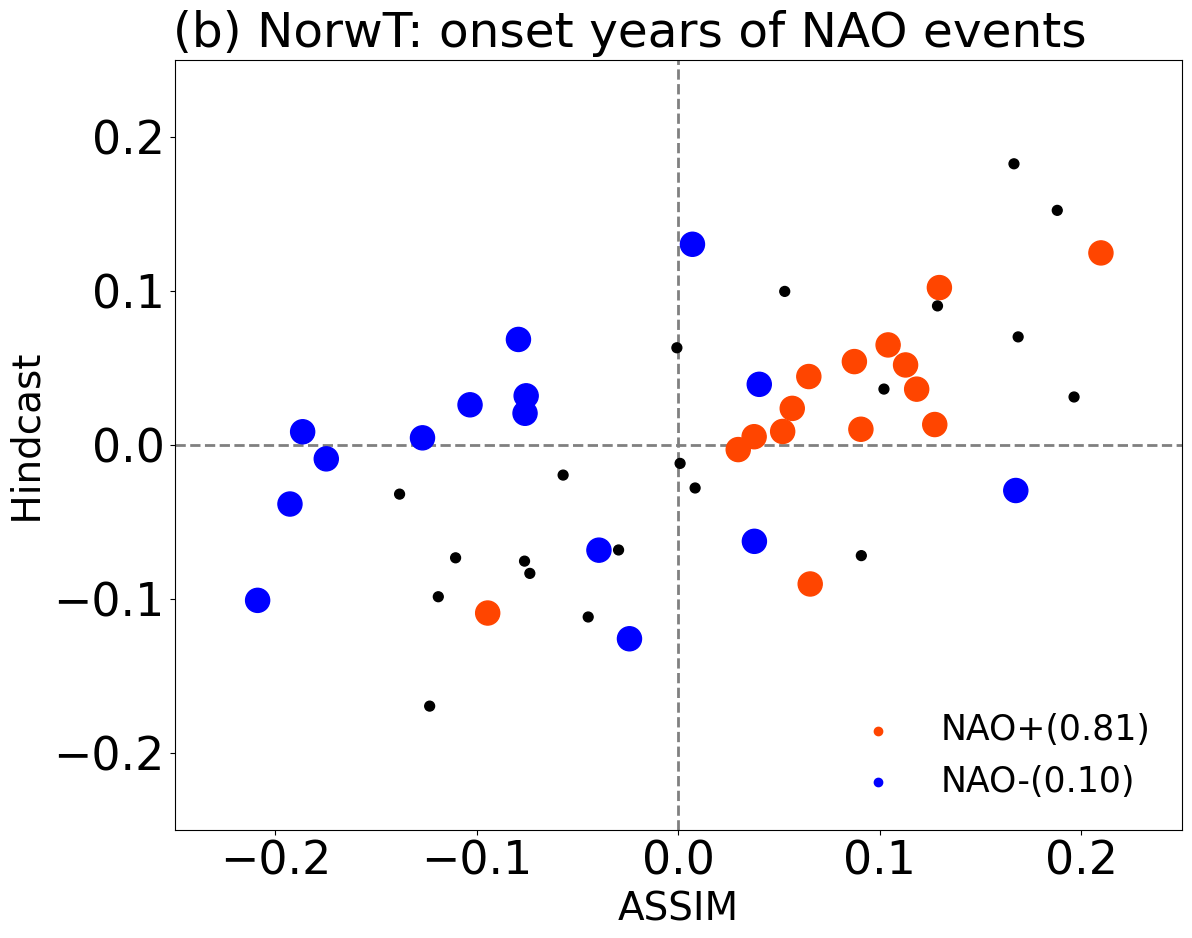

In [26]:
x = nao   # C2
pred = hind[:,0]
events = np.zeros((50))
marksize = np.zeros((50))
w=-1
n=0
s=1
color = []
s=50
l=300


for i in range(0,50,1):
        if x[i] <= sorted(x)[14]:
            events[i] = w
            color.append('blue')
            marksize[i] = l
    
        elif x[i] >= sorted(x)[-15]:
            events[i] = s
            color.append('orangered')
            marksize[i] = l
        else:
            events[i] = n
            color.append('black')
            marksize[i] = s

fig, ax = plt.subplots(figsize = [13,10])

# ax.plot(referx, referx, '-', linestyle='dashed', color='gray', linewidth=2, markersize=10, label = '',zorder=-1)

ax.scatter(assi, pred,  marksize, color, zorder=1)

ax.scatter(1, 1,  color='orangered', label = 'NAO+(0.81)')
ax.scatter(1, 1,  color='blue', label = 'NAO-(0.10)')

ax.axhline(0, linewidth=2, color='gray', linestyle= 'dashed',zorder=-1)
ax.axvline(0, linewidth=2, color='gray', linestyle= 'dashed',zorder=-1)
ax.set(xlabel='ASSIM', ylabel=' Hindcast',
       title=' ')
ax.set_xlim(-0.25, 0.25)
ax.set_ylim(-0.25, 0.25)
fig.suptitle('(b) NorwT: onset years of NAO events', x=0.475, y=0.93, fontsize=35)
ax.tick_params(axis='both', labelsize=33)
ax.legend(loc='lower right', fontsize='25',frameon=False)

# ax.annotate('5%', fontsize='16',
#             xy=(80, 150), xycoords='figure points')

plt.rcParams["font.size"] = "28"
plt.show()
fig.savefig('/work/uo1075/u241321/results/p8.2.pdf', bbox_inches='tight')